# 02.3 - Ticks, escalas e formatação de imagem
## Tratamento, exploração e visualização de dados Tratamento, exploração e visualização de dados

Dataset: 

http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def
Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Valor total
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
 <br/>
 
https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados
Estimativas de população publicadas no DOU
 
- Tabela de estimativas populacionais para os municípios e para as Unidades da Federação brasileiros em 01.07.2020:

"Atendendo ao dispositivo legal, Lei nº 8443, de 16 de julho de 1992, no artigo 102, o IBGE fez publicar no Diário Oficial da União, em 27 de agosto de 2020, as estimativas de população para os municípios e para as Unidades da Federação brasileiros, com data de referência em 1º de julho de 2020. A Lei complementar nº 143, de 17 de julho de 2013, alterou o art. 102 da Lei nº 8443, revogando os parágrafos 1º e 2º, que estabelecia o prazo de 20 dias após a publicação das estimativas no Diário Oficial da União para apresentação de reclamações ao IBGE."


<br/>

https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

Dados da tabela disponibilizada pelo wikipédia
 
 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",", engine="python")

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

In [5]:
usaveis = dados[colunas_usaveis]

In [6]:
usaveis = usaveis.set_index("Unidade da Federação")

In [7]:
usaveis = usaveis.drop("Total", axis=1)

In [8]:
usaveis["Total"] = usaveis.sum(axis=1) # [0,1,2] ["SP"]

In [9]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total.index = ordenado_por_total.index.str[3:]
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

In [10]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [11]:
ordenado_por_total = ordenado_por_total / 1000000

In [12]:
meses_filtrados = ordenado_por_total.columns[47:150]

In [13]:
mes_mais_recente = ordenado_por_total.columns[-1]

In [14]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]

In [15]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)

In [16]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()

In [17]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")

In [18]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1

In [19]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index("uf")

In [20]:
populacao.index = populacao.index.str.strip()

In [21]:
for estado in gastos_do_mais_recente.index:
    # print(f"{estado} {estado} => {estado}")
    populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)

In [22]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)

In [23]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
    gastos_do_mes = todos_os_gastos[mes]
    dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
    dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]

In [24]:
# horripilante (data visualization)
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Jul")

In [25]:
import seaborn as sns

In [26]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Jun")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Mai")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Abr")

In [28]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.834915,170.481850,170.278286,172.402181,175.416596,179.525002,179.898070,180.082204,191.685220,190.539739,...,303.382527,282.391773,272.697695,301.991168,271.356784,276.606289,251.696363,302.857661,299.060852,282.709570
Minas Gerais,70.301090,79.119006,79.046322,79.268070,79.608653,82.200224,80.374117,82.400147,88.613477,84.486996,...,166.133803,152.106660,152.398599,158.097904,141.323176,147.078556,126.330650,136.867276,135.977572,120.467187
Paraná,48.855046,55.611791,56.115136,55.574832,56.094755,59.802402,56.699001,58.091986,61.365941,59.667209,...,133.847978,126.209369,113.545319,122.268754,116.061603,114.476998,96.727112,106.103738,92.901461,80.320853
Rio Grande do Sul,45.897705,52.928696,51.972417,51.679351,53.759674,56.391648,56.233759,57.910171,59.592125,57.565742,...,96.913905,90.971809,88.720874,97.474363,85.451646,84.651397,76.294597,86.076113,89.019479,78.929704
Rio de Janeiro,44.122593,42.892666,45.295963,43.951349,44.102926,44.348520,42.487940,43.066461,44.553315,41.351512,...,82.247729,74.620477,74.895862,79.705664,72.412810,73.594498,68.160773,86.281033,77.604925,71.540227


<AxesSubplot:ylabel='São Paulo'>

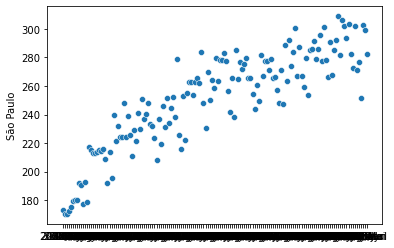

In [30]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])

 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)